# Task1

In [7]:
import cv2
import numpy

In [9]:
import cv2

# reading the image
img = cv2.imread('/content/a1.png')
# convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
sift = cv2.xfeatures2d.SIFT_create()

In [11]:
keypoints, descriptors = sift.detectAndCompute(img, None)

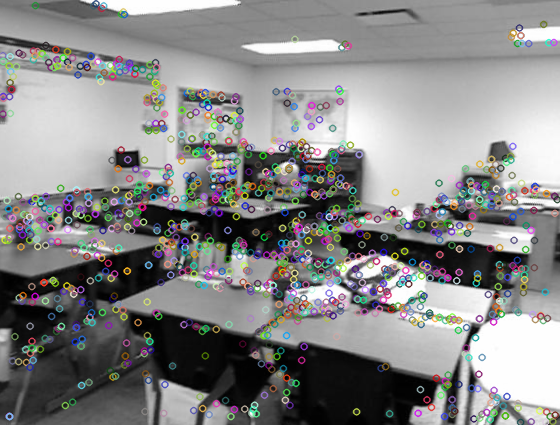

True

In [12]:
from google.colab.patches import cv2_imshow

sift_image = cv2.drawKeypoints(gray, keypoints, img)
# show the image
cv2_imshow(sift_image)
cv2.imwrite("output.png", sift_image)

Matching

In [13]:
import cv2

# read the images
img1 = cv2.imread('/content/a1.png')
img2 = cv2.imread('/content/a2.png')

# convert images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

In [14]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)

In [15]:
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

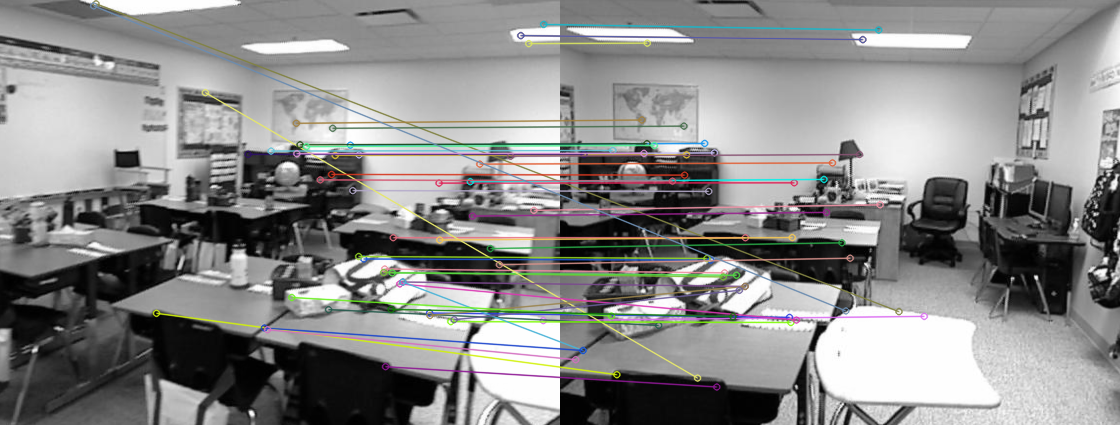

True

In [16]:
cv2_imshow(matched_img)
cv2.imwrite("matched_images.jpg", matched_img)

### Surf and orb

In [5]:
import cv2
orb = cv2.ORB_create(nfeatures=1500)

In [20]:
img1 = cv2.imread('/content/a1.png')
img2 = cv2.imread('/content/a2.png')

# convert images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# create SIFT object
orb = cv2.ORB_create(nfeatures=1500)

# detect SIFT features in both images
keypoints_1, descriptors_1 = orb.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = orb.detectAndCompute(img2,None)

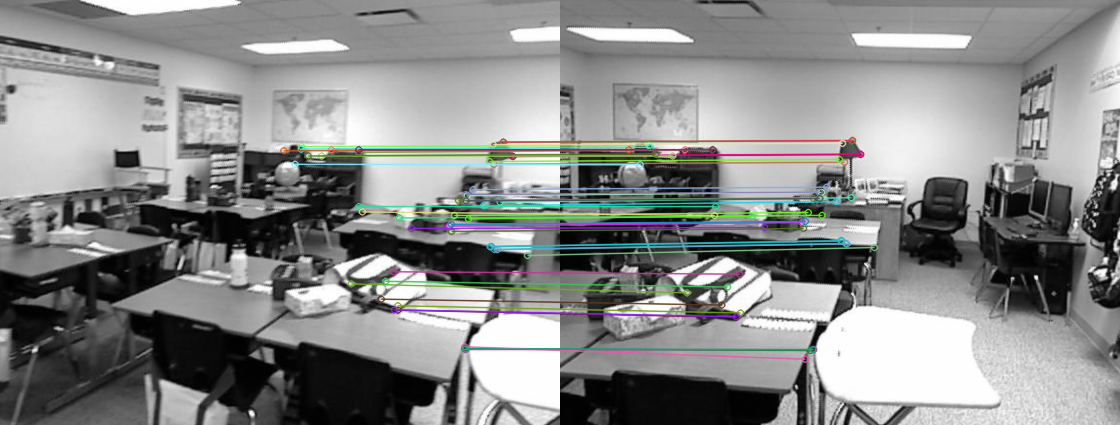

True

In [21]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)

matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

cv2_imshow(matched_img)
cv2.imwrite("matched_images_orb.jpg", matched_img)

# Task2

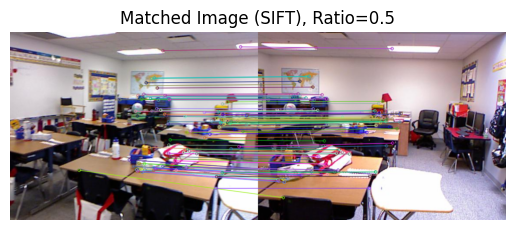

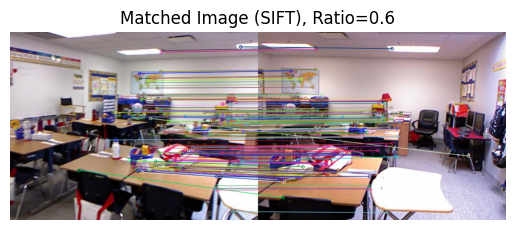

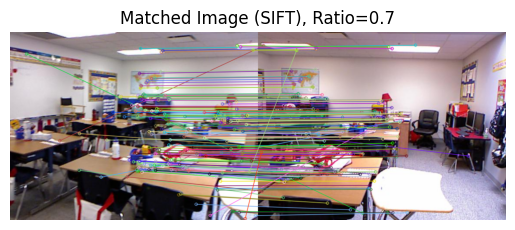

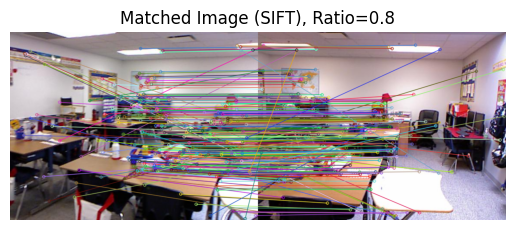

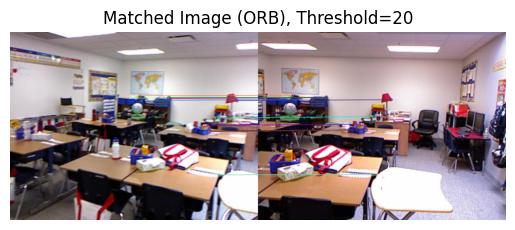

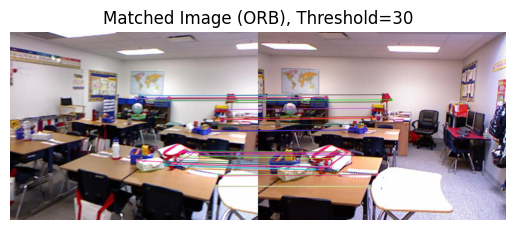

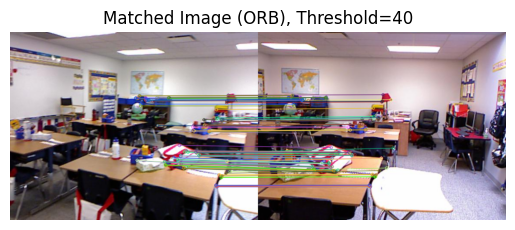

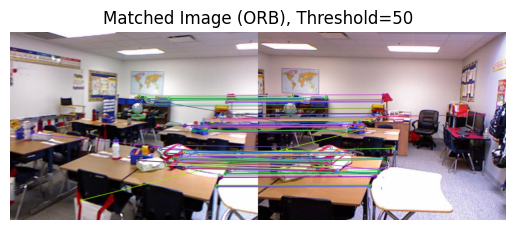

In [89]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('/content/a1.png')
img2 = cv2.imread('/content/a2.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
orb = cv2.ORB_create()

keypoints_1_sift, descriptors_1_sift = sift.detectAndCompute(gray1, None)
keypoints_2_sift, descriptors_2_sift = sift.detectAndCompute(gray2, None)

keypoints_1_orb, descriptors_1_orb = orb.detectAndCompute(gray1, None)
keypoints_2_orb, descriptors_2_orb = orb.detectAndCompute(gray2, None)

bf_sift = cv2.BFMatcher()
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

ratio_values_sift = [0.5, 0.6, 0.7, 0.8]
thresholds_orb = [20, 30, 40, 50]

# SIFT matching with different ratios
for ratio in ratio_values_sift:
    matches_sift = bf_sift.knnMatch(descriptors_1_sift, descriptors_2_sift, k=2)

    good_matches_sift = []
    for m, n in matches_sift:
        if m.distance < ratio * n.distance:
            good_matches_sift.append(m)

    matched_img_sift = cv2.drawMatches(img1, keypoints_1_sift, img2, keypoints_2_sift, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.imshow(cv2.cvtColor(matched_img_sift, cv2.COLOR_BGR2RGB))
    plt.title(f"Matched Image (SIFT), Ratio={ratio}")
    plt.axis('off')
    plt.savefig(f"matched_images_sift_ratio_{ratio}.jpg")
    plt.show()

# ORB matching with different thresholds
for threshold in thresholds_orb:
    matches_orb = bf_orb.match(descriptors_1_orb, descriptors_2_orb)

    good_matches_orb = [match for match in matches_orb if match.distance < threshold]

    matched_img_orb = cv2.drawMatches(img1, keypoints_1_orb, img2, keypoints_2_orb, good_matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.imshow(cv2.cvtColor(matched_img_orb, cv2.COLOR_BGR2RGB))
    plt.title(f"Matched Image (ORB), Threshold={threshold}")
    plt.axis('off')
    plt.savefig(f"matched_images_orb_threshold_{threshold}.jpg")
    plt.show()


# Task 3

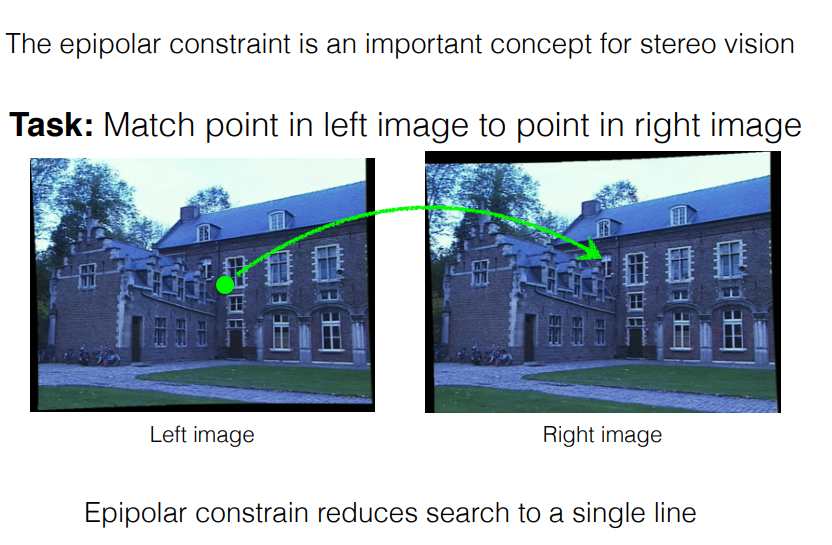

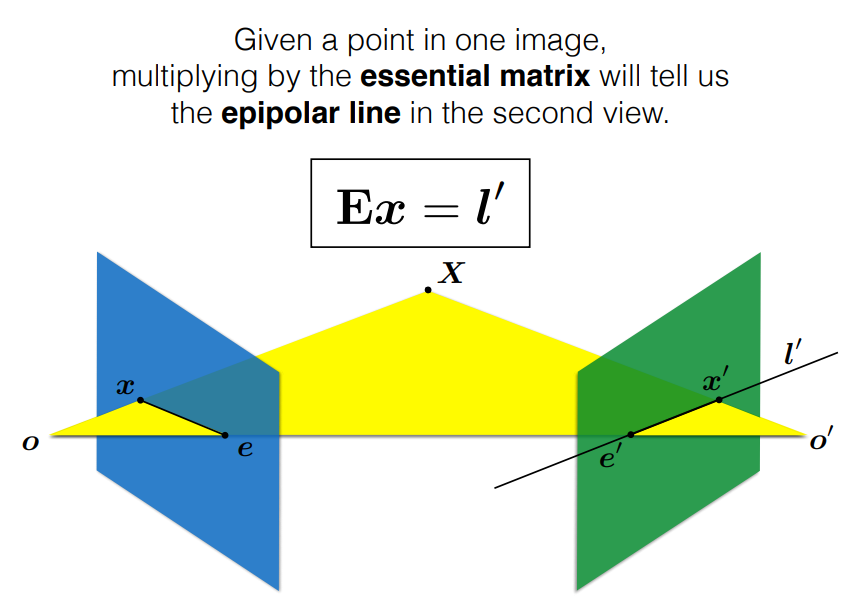

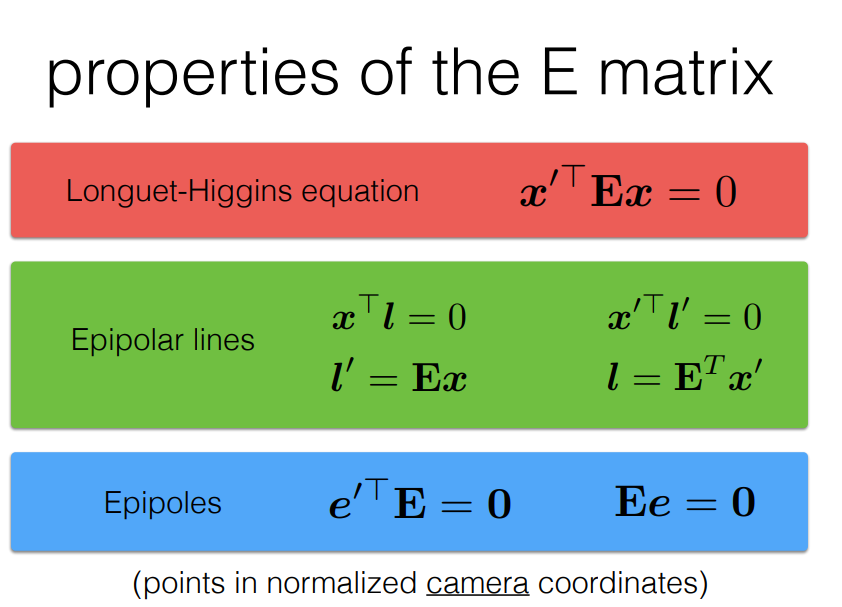

In [73]:
import numpy as np
counter = 0

#Replace K with given Intrinsic Matrix
K = np.array([[518.86, 0., 285.58],
              [0., 519.47, 213.74],
              [0.,   0.,   1.]])

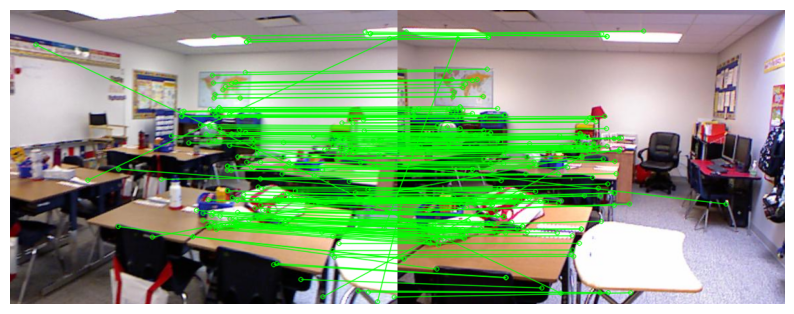

In [81]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0        #FLANN (Fast Library for Approximate Nearest Neighbors)
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)  #50 iterations to search for the best match
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)  #2-nearest neighbour for each descriptor

good = []     # matches that pass the Lowe's test
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

MIN_MATCH_COUNT = 3   #minimum number of matches required to find the object (More the better)

if len(good)>MIN_MATCH_COUNT:
    p1 = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)   #get the keypoints corresponding to the each good match for Image1
    p2 = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)   #for Image 2

draw_params = dict(matchColor = (0,255,0), singlePointColor = None, flags = 2)
img_siftmatch = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
# Convert the image from OpenCV's BGR format to RGB for displaying in matplotlib
img_siftmatch_rgb = cv2.cvtColor(img_siftmatch, cv2.COLOR_BGR2RGB)
# Display the image in the output cell
plt.figure(figsize=(10, 10))
plt.imshow(img_siftmatch_rgb)
plt.axis('off')  # Turn off axis numbers
plt.show()

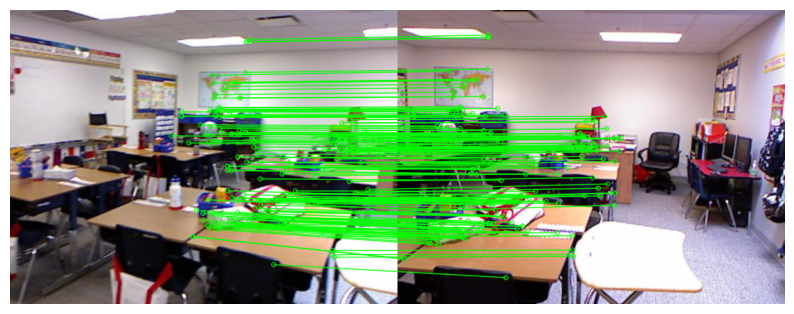

In [82]:
#essential matrix
#Ransac is used to estimate the essential matrix by fitting keypoints in the model
#mask is used to filter out the outliers (0 then it is outlier, 1 then it is inlier)
E, mask = cv2.findEssentialMat(p1, p2, K, cv2.RANSAC, 0.999, 1.0);    #confidence level=0.999, threshold=1.0 (Greater the threshold, lesser the outliers)
matchesMask = mask.ravel().tolist()
draw_params = dict(matchColor = (0,255,0), singlePointColor = None,matchesMask = matchesMask,flags = 2)
img_inliermatch = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
# Convert the image from OpenCV's BGR format to RGB for displaying in matplotlib
img_inliermatch_rgb = cv2.cvtColor(img_inliermatch, cv2.COLOR_BGR2RGB)
# Display the image in the output cell
plt.figure(figsize=(10, 10))
plt.imshow(img_inliermatch_rgb)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [83]:
print("Essential matrix:")
print(E)

Essential matrix:
[[ 0.03529077 -0.64288908  0.00592328]
 [ 0.49342169  0.02861084 -0.50550124]
 [-0.02644593  0.29126419  0.00799014]]


In [84]:
points, R, t, mask = cv2.recoverPose(E, p1, p2)
print("Rotation:")
print(R)
print("Translation:")
print(t)
p1_tmp = np.ones([3, p1.shape[0]])
p1_tmp[:2,:] = np.squeeze(p1).T
p2_tmp = np.ones([3, p2.shape[0]])
p2_tmp[:2,:] = np.squeeze(p2).T
#Print the difference between transformed points and original points
print((np.dot(R, p2_tmp) + t) - p1_tmp)

Rotation:
[[ 0.93091648  0.04776557 -0.36209524]
 [-0.04717009  0.99883179  0.01048993]
 [ 0.36217329  0.00731482  0.93208208]]
Translation:
[[-0.41331127]
 [-0.01923294]
 [-0.91038667]]
[[ 2.01094466e+02 -1.00079780e+02 -8.64152128e+01  7.58630265e+01
   1.02391540e+02  8.60381045e+01 -2.17275428e+02 -2.19148079e+02
  -2.19497368e+02 -2.20954444e+02 -2.16717600e+02 -2.19675816e+02
  -2.39285126e+02 -2.39285126e+02 -2.31986455e+02 -2.14732963e+02
  -2.31371969e+02 -2.30190300e+02 -2.12959865e+02 -2.29144389e+02
  -2.30760861e+02 -2.10340058e+02 -2.28887066e+02 -2.14436388e+02
  -2.14191613e+02 -2.28607358e+02 -2.29520048e+02 -2.18574216e+02
  -2.30210198e+02 -2.12923360e+02 -2.16655234e+02  3.70079857e+01
  -2.15273721e+02 -2.28014743e+02 -2.08083053e+02 -2.15096329e+02
  -2.12147462e+02 -2.27875426e+02 -2.13017645e+02 -2.11477986e+02
  -2.12049469e+02 -2.12049469e+02 -2.11325397e+02 -2.10403481e+02
  -2.28982629e+02 -2.27218646e+02 -2.09231012e+02 -2.12360181e+02
  -2.15080829e+02 -2.

Projection:

In [85]:
#triangulation
#calculate projection matrix for both camera
M_r = np.hstack((R, t))    #for right camera, Stack R and t horizontally to form the extrinsic matrix, dimension = 3 X 4
M_l = np.hstack((np.eye(3, 3), np.zeros((3, 1))))   #Taking extrinsic matrix for left camera as identiy matrix, dimension = 3 X 1
#In Stereo Vision, Left Camera is usually taken as reference camera
P_l = np.dot(K,  M_l)    #projection matrix for left camera by taking dot of intrinsic matrix and projection matrix
P_r = np.dot(K,  M_r)    #projection matrix for right camera by taking dot of intrinsic matrix and projection matrix

# undistort points is to correct the distortion by the camera's lens. They can introduce distortion, particularly radial distortion, which causes straight lines to appear curved.
p1 = p1[np.asarray(matchesMask)==1,:,:]    #keep only inliers
p2 = p2[np.asarray(matchesMask)==1,:,:]
p1_un = cv2.undistortPoints(p1,K,None)     #undistort the points using the intrinsic matrix
p2_un = cv2.undistortPoints(p2,K,None)
p1_un = np.squeeze(p1_un)     #remove the extra dimension
p2_un = np.squeeze(p2_un)
p1_un_dis = np.squeeze(p1)
p2_un_dis = np.squeeze(p2)
#triangulate points this requires points in normalized coordinate
point_4d_hom = cv2.triangulatePoints(P_l, P_r, p1_un.T, p2_un.T)
point_3d = point_4d_hom / np.tile(point_4d_hom[-1, :], (4, 1))  #normalize the 4D points by dividing by the last element
point_3d = point_3d[:3, :].T

point_4d_hom_dis = cv2.triangulatePoints(P_l, P_r, p1_un_dis.T, p2_un_dis.T)
point_3d_dis = point_4d_hom_dis / np.tile(point_4d_hom_dis[-1, :], (4, 1))  #normalize the 4D points by dividing by the last element
point_3d_dis = point_3d_dis[:3, :].T

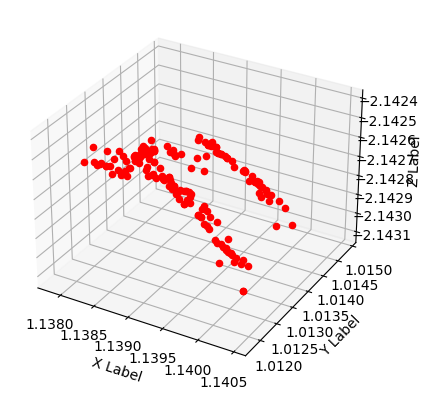

In [58]:
#Display 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
for x, y, z in point_3d:
    ax.scatter(x, y, z, c="r", marker="o")
plt.show()

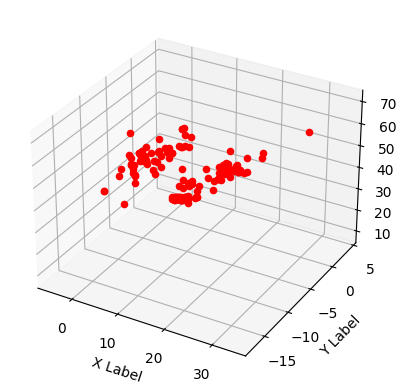

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
for x, y, z in point_3d_dis:
    ax.scatter(x, y, z, c="r", marker="o")
plt.show()

In [59]:
with open('3D_Object'+ '.obj', 'w') as f:
    for x, y, z in point_3d:
        f.write(f"v {x} {y} {z}\n")
fig.savefig('3D_Plot'+ '.jpg')

In [87]:
with open('3D_Object_dis'+ '.obj', 'w') as f:
    for x, y, z in point_3d_dis:
        f.write(f"v {x} {y} {z}\n")
fig.savefig('3D_Plot_dis'+ '.jpg')

# Orb

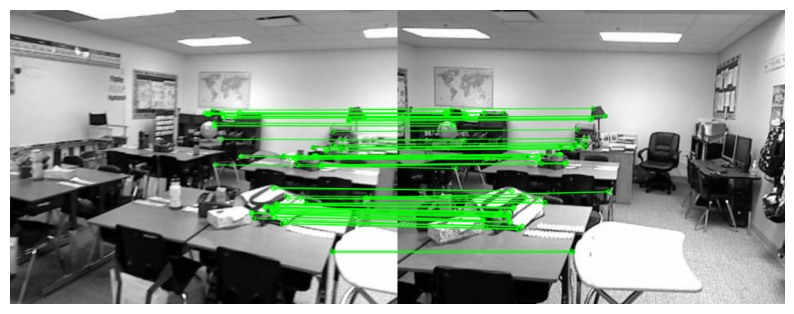

Essential matrix:
[[ 1.69078953e-05 -6.11371849e-04  1.04683648e-01]
 [ 1.16270072e-04  1.88169981e-04 -6.99314839e-01]
 [-4.15309607e-02  7.05885807e-01  2.69522924e-04]]


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread('/content/a1.png', 0)
img2 = cv2.imread('/content/a2.png', 0)

# Create ORB object
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

# FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test to select good matches
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

# Minimum number of matches required
MIN_MATCH_COUNT = 3

if len(good) > MIN_MATCH_COUNT:
    # Get corresponding keypoints
    p1 = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    p2 = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # Compute Essential matrix using RANSAC
    E, mask = cv2.findEssentialMat(p1, p2, method=cv2.RANSAC, prob=0.999, threshold=1.0)

    # Filter out outliers using mask
    matchesMask = mask.ravel().tolist()

    # Draw inlier matches
    draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
    img_inliermatch = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

    # Convert the image to RGB for displaying in matplotlib
    img_inliermatch_rgb = cv2.cvtColor(img_inliermatch, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img_inliermatch_rgb)
    plt.axis('off')
    plt.show()

    print("Essential matrix:")
    print(E)
else:
    print("Not enough matches are found!")


In [51]:
points, R, t, mask = cv2.recoverPose(E, p1, p2)
print("Rotation:")
print(R)
print("Translation:")
print(t)
p1_tmp = np.ones([3, p1.shape[0]])
p1_tmp[:2,:] = np.squeeze(p1).T
p2_tmp = np.ones([3, p2.shape[0]])
p2_tmp[:2,:] = np.squeeze(p2).T
#Print the difference between transformed points and original points
print((np.dot(R, p2_tmp) + t) - p1_tmp)

Rotation:
[[ 9.95968317e-01 -8.97030857e-02 -6.84745616e-04]
 [ 8.97032960e-02  9.95968493e-01  2.82907168e-04]
 [ 6.56607413e-04 -3.43190515e-04  9.99999726e-01]]
Translation:
[[-9.88980242e-01]
 [-1.48045307e-01]
 [-8.17096746e-04]]
[[-2.33888275e+02 -2.71433104e+02 -2.47545660e+02  1.30324380e+02
  -2.47405761e+02 -2.27854379e+02 -2.46314007e+02 -2.29875386e+02
  -2.41871543e+02 -2.25791884e+02 -2.28670941e+02 -2.41041031e+02
  -2.48181645e+02 -2.47783687e+02 -2.28013445e+02 -2.24638117e+02
  -2.26377295e+02 -2.19835627e+02 -2.25035969e+02 -2.29540243e+02
  -2.27330590e+02 -2.43128443e+02 -2.35792525e+02 -2.30713881e+02
   1.30524377e+02 -2.70972558e+02 -2.27120114e+02 -2.24936231e+02
  -2.47793690e+02 -2.28264298e+02 -2.54104345e+02 -2.48036411e+02
  -2.26977301e+02 -2.29476200e+02 -2.49089650e+02 -2.45678371e+02
  -2.45781915e+02 -2.48691948e+02 -2.45528437e+02 -2.54410986e+02
  -2.25775119e+02 -2.26351907e+02 -2.25182145e+02 -2.48210400e+02
  -2.28221935e+02 -2.22275630e+02 -2.33